In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['legend.frameon']=False
plt.rcParams['axes.spines.top']=False
plt.rcParams['axes.spines.right']=False
plt.rcParams['axes.spines.bottom']=False
plt.rcParams['ytick.labelsize']=20
plt.rcParams['axes.labelsize']=20
plt.rcParams['axes.titlesize']=20

In [3]:
import pandas as pd
air=pd.read_excel('https://labfile.oss.aliyuncs.com/courses/3023/guangdong-air.xls')
air.head()

,监测站名称,所属城市,日期,空气质量状况,API值,首要污染物,空气质量级别
0,广雅中学,广州,2001-01-01,优,48,--,Ⅰ级
1,西来西小学,广州,2001-01-01,优,45,--,Ⅰ级
2,市五中,广州,2001-01-01,优,41,--,Ⅰ级
3,天河职幼,广州,2001-01-01,优,47,--,Ⅰ级
4,市监测站,广州,2001-01-01,良,59,可吸入颗粒物,Ⅱ级


### Frequency

In [4]:
air_condition=air.groupby(['空气质量状况']).size()
air_condition

空气质量状况
优       317
良       604
轻度污染      7
轻微污染     71
dtype: int64

In [6]:
air['空气质量状况'].value_counts()

良       604
优       317
轻微污染     71
轻度污染      7
Name: 空气质量状况, dtype: int64

In [10]:
import matplotlib
import os
import wget

file=wget.download('https://labfile.oss.aliyuncs.com/courses/3023/NotoSansCJK.otf')
fpath=os.path.join('./NotoSansCJK.otf')
myfont=matplotlib.font_manager.FontProperties(fname=fpath,size=20)

In [12]:
import warnings

warnings.filterwarnings('ignore')

[Text(0, 0, '优'), Text(1, 0, '良'), Text(2, 0, '轻度污染'), Text(3, 0, '轻微污染')]

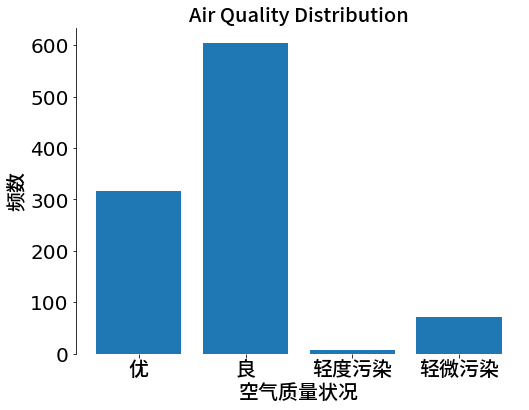

In [13]:
plt.rcParams['figure.figsize']=(8,6)
plt.bar(x=air_condition.index,height=air_condition)
plt.xlabel('空气质量状况',fontproperties=myfont)
plt.ylabel('频数',fontproperties=myfont)
plt.title('Air Quality Distribution',fontproperties=myfont)

ax=plt.gca()

ax.xaxis.set_ticklabels(ticklabels=air_condition.index,fontproperties=myfont)

### Visualisation

In [14]:
import numpy as np

def gt_p(x,array):
    return np.sum(array>=x)/len(array)

def lt_p(x,array):
    return -1*np.sum(array<x)/len(array)

air['gt_air']=air['API值'].apply(lambda x: 100*gt_p(x,air['API值']))
air['lt_air']=air['API值'].apply(lambda x: 100*lt_p(x,air['API值']))
air=air.sort_values(by=['gt_air'],ascending=False)
air.head()

,监测站名称,所属城市,日期,空气质量状况,API值,首要污染物,空气质量级别,gt_air,lt_air
926,天河职幼,广州,2001-01-26,优,0,--,Ⅰ级,100.0000,0.0000
923,西来西小学,广州,2001-01-26,优,6,--,Ⅰ级,99.8999,-0.1001
942,深村,佛山,2001-01-26,优,8,--,Ⅰ级,99.7998,-0.2002
971,香洲,珠海,2001-01-27,优,9,--,Ⅰ级,99.6997,-0.3003
922,广雅中学,广州,2001-01-26,优,10,--,Ⅰ级,99.5996,-0.4004


Text(0.5, 1.0, 'The percent of greater or less than current API value')

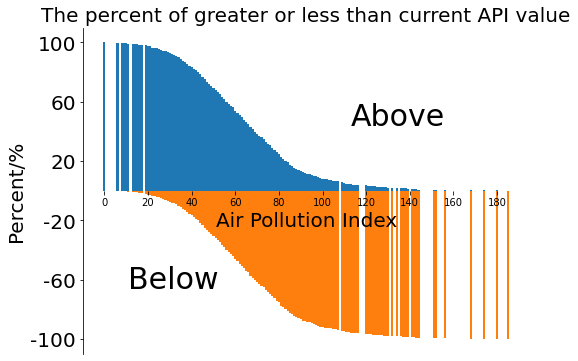

In [16]:
plt.rcParams['figure.figsize']=(8,6)
plt.bar(x='API值',height='gt_air',data=air,width=1.0)
plt.bar(x='API值',height='lt_air',data=air,width=1.0)

yticks=np.arange(-100,120,40)
plt.yticks(ticks=yticks,labels=['%.0f' % label for label in yticks])
plt.xticks(ticks=np.arange(0,200,20))

plt.xlabel('Air Pollution Index')
plt.ylabel('Percent/%')

ax=plt.gca()
ax.spines['bottom'].set_position(['data',0])

ax.text(0.6,0.7,'Above',size=30,transform=ax.transAxes)
ax.text(0.1,0.2,'Below',size=30,transform=ax.transAxes)

plt.title('The percent of greater or less than current API value')

### Statistics

Text(0.5, 1.0, 'Major City Pollution Distribution')

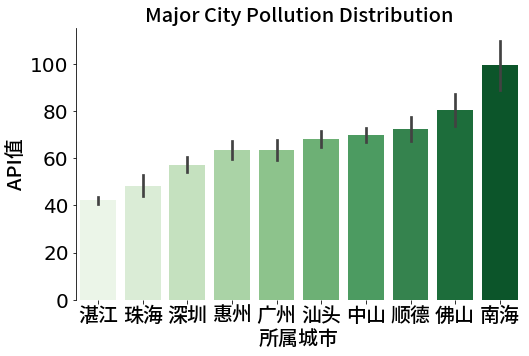

In [18]:
import seaborn as sns

plt.rcParams['figure.figsize']=(8,5)

order=air.groupby(['所属城市'],as_index=False)['API值'].mean().sort_values(['API值'])['所属城市']
sns.barplot(x='所属城市',y='API值',order=order,palette='Greens',data=air)

ax=plt.gca()
ax.set_xlabel(ax.get_xlabel(),fontproperties=myfont)
ax.set_ylabel(ax.get_ylabel(),fontproperties=myfont)
ax.xaxis.set_ticklabels(ticklabels=ax.get_xticklabels(),fontproperties=myfont)
ax.set_title('Major City Pollution Distribution',fontproperties=myfont)

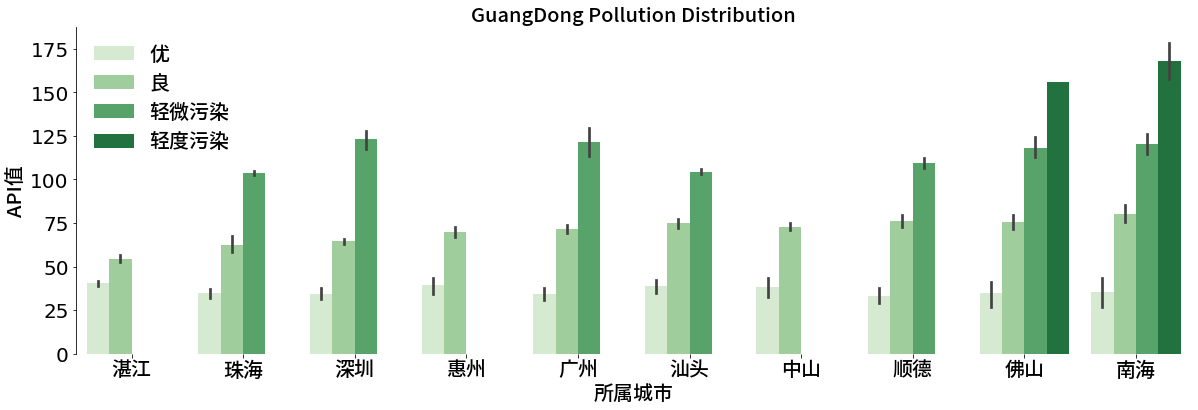

In [19]:
plt.rcParams['figure.figsize']=(20,6)

order=air.groupby(['所属城市'],as_index=False)['API值'].mean().sort_values(['API值'])['所属城市']
sns.barplot(x='所属城市',y='API值',hue='空气质量状况',order=order,palette='Greens',data=air)

ax=plt.gca()
ax.set_xlabel(ax.get_xlabel(),fontproperties=myfont)
ax.set_ylabel(ax.get_ylabel(),fontproperties=myfont)
ax.xaxis.set_ticklabels(ticklabels=ax.get_xticklabels(),fontproperties=myfont)
ax.set_title('GuangDong Pollution Distribution',fontproperties=myfont)
ax.legend(prop=myfont,frameon=False)

Text(0.5, 1.0, 'GuangDong Pollution Distribution')

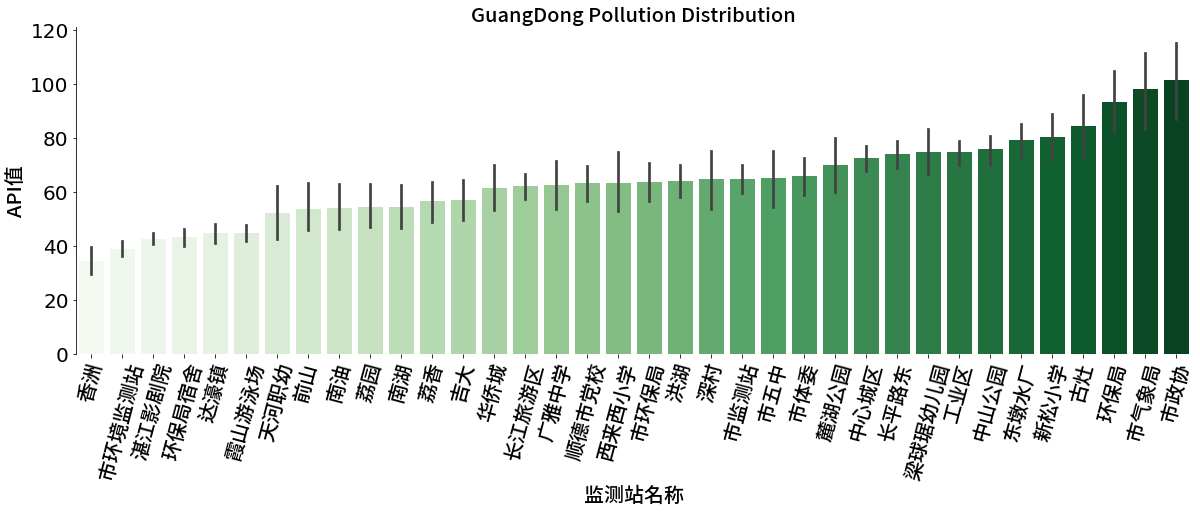

In [22]:
plt.rcParams['figure.figsize']=(20,6)

order=air.groupby(['监测站名称'],as_index=False)['API值'].mean().sort_values(['API值'])['监测站名称']
sns.barplot(x='监测站名称',y='API值',palette='Greens',order=order,data=air)

ax=plt.gca()
ax.set_xlabel(ax.get_xlabel(),fontproperties=myfont)
ax.set_ylabel(ax.get_ylabel(),fontproperties=myfont)
ax.xaxis.set_ticklabels(ticklabels=ax.get_xticklabels(),fontproperties=myfont,rotation=75)
ax.set_title('GuangDong Pollution Distribution',fontproperties=myfont)

### Air Quality Cluster

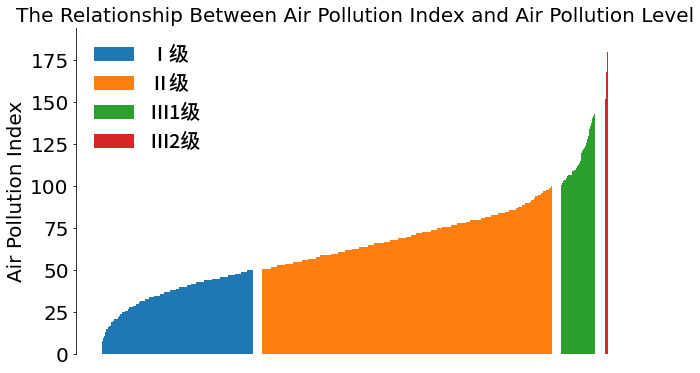

In [28]:
plt.rcParams['figure.figsize']=(10,6)

start=0
cluster_distance=20

for level in ['Ⅰ级','Ⅱ级','Ⅲ1级','Ⅲ2级']:
    air_level=air.loc[air['空气质量级别']==level]
    air_level=air_level.sort_values(['API值'])
    nums=len(air_level)
    plt.bar(x=np.arange(start=start,stop=start+nums,step=1),height=air_level['API值'],width=1.0,label=level)
    start+=nums+cluster_distance

plt.xticks(ticks=[])
plt.ylabel('Air Pollution Index')
plt.title('The Relationship Between Air Pollution Index and Air Pollution Level')

ax=plt.gca()
ax.legend(prop=myfont,frameon=False)

### Proportion of Good Air Quality

In [29]:
air.loc[air['空气质量状况']=='优','excellent']='Excellent'
air.loc[air['空气质量状况']!='优','excellent']='Nonexcellent'

air_ex=air.pivot_table(values='日期',index='所属城市',columns='excellent',aggfunc='count')
freqs=air_ex.sum(axis=1)
for col in air_ex.columns:
    air_ex[col]=air_ex[col]/freqs*100

air_ex['city']=air_ex.index
air_ex

excellent,Excellent,Nonexcellent,city
所属城市,,,
中山,8.641975,91.358025,中山
佛山,16.666667,83.333333,佛山
南海,11.111111,88.888889,南海
广州,30.909091,69.090909,广州
惠州,20.987654,79.012346,惠州
汕头,19.444444,80.555556,汕头
深圳,30.864198,69.135802,深圳
湛江,86.111111,13.888889,湛江
珠海,58.024691,41.975309,珠海


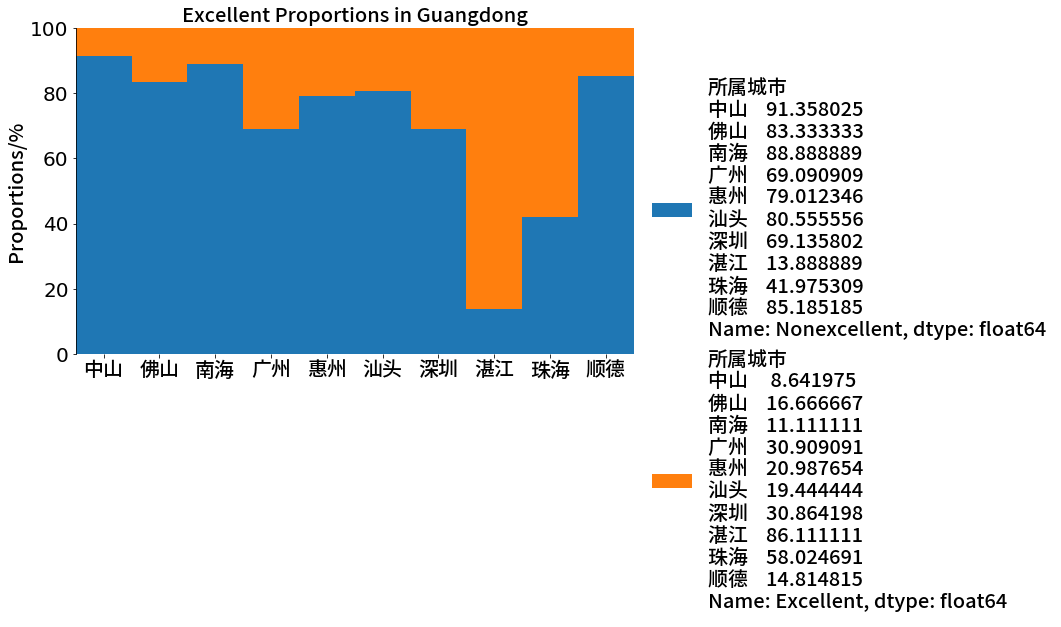

In [30]:
plt.rcParams['figure.figsize']=(10,6)

plt.bar(x='city',height='Nonexcellent',data=air_ex,width=1.0,label='Nonexcellent')
plt.bar(x='city',height='Excellent',bottom='Nonexcellent',data=air_ex,width=1.0,label='Excellent')
plt.xlim((-0.5,len(air_ex)-0.5))
plt.ylim((0,100))

ax=plt.gca()
ax.set_xlabel(ax.get_xlabel(),fontproperties=myfont)
ax.set_ylabel('Proportions/%',fontproperties=myfont)

ax.xaxis.set_ticklabels(ticklabels=air_ex['city'],fontproperties=myfont)
ax.set_title('Excellent Proportions in Guangdong',fontproperties=myfont)
ax.legend(prop=myfont,bbox_to_anchor=(1.0,0.9),frameon=False)

### Map Charts

In [33]:
from pyecharts.charts import Map
from pyecharts import options as opts

m=Map()
m.add(series_name='',maptype='广东',data_pair=[list(z) for z in zip(air_ex['city'].apply(lambda x:x+'市'),air_ex['Excellent'])],
      label_opts=opts.LabelOpts(is_show=False),is_map_symbol_show=False)
m.set_global_opts(title_opts=opts.TitleOpts(title='Excellent Proportions in Guangdong',
                                            subtitle='Unit: %',pos_left='center',pos_top='top',
                                            title_textstyle_opts=opts.TextStyleOpts(font_size=25)),
                  visualmap_opts=opts.VisualMapOpts(min_=0,max_=100,range_text=['High','Low'],range_color=['red','green']))
m.render_notebook()

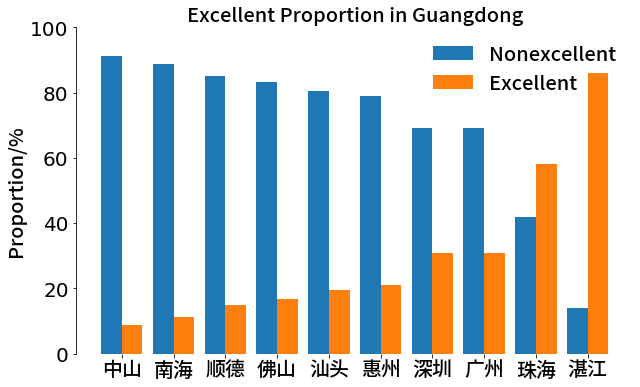

In [35]:
air_ex=air_ex.sort_values(['Excellent'])
xs=np.array(range(len(air_ex['city'])))
width=.4
plt.bar(x=xs-width/2,height=air_ex['Nonexcellent'],width=width,label='Nonexcellent')
plt.bar(x=xs+width/2,height=air_ex['Excellent'],width=width,label='Excellent')
plt.ylim((0,100))
plt.xticks(ticks=xs,labels=air_ex['city'])

ax=plt.gca()
ax.set_xlabel(ax.get_xlabel(),fontproperties=myfont)
ax.set_ylabel('Proportion/%',fontproperties=myfont)
ax.xaxis.set_ticklabels(ticklabels=ax.get_xticklabels(),fontproperties=myfont)
ax.set_title('Excellent Proportion in Guangdong',fontproperties=myfont)
ax.legend(prop=myfont,frameon=False)

### Bar

In [45]:
import matplotlib.colors as cs
from pyecharts.charts import Bar

font_size=20

bar=Bar()
bar.add_xaxis(list(air_ex.city))
bar.add_yaxis(series_name='Excellent Proportion/%',y_axis=list(air_ex.Excellent.apply(lambda x: round(x,2))),
              is_selected=True,color=cs.TABLEAU_COLORS['tab:blue'])
bar.add_yaxis(series_name='Nonexcellent Proportion/%',y_axis=list(air_ex.Nonexcellent.apply(lambda x: round(x,2))),
              is_selected=False,color=cs.TABLEAU_COLORS['tab:orange'])
bar.set_global_opts(title_opts=opts.TitleOpts(title='Excellent Proportions in Guangdong',pos_left='25%',
                                              title_textstyle_opts=opts.TextStyleOpts(font_size=25)),
                    legend_opts=opts.LegendOpts(pos_top='10%',textstyle_opts=opts.TextStyleOpts(font_size=font_size)),
                    yaxis_opts=opts.AxisOpts(name='Proportion/%',name_textstyle_opts=opts.TextStyleOpts(font_size=font_size),
                                             axislabel_opts=opts.TextStyleOpts(font_size=font_size)),
                    xaxis_opts=opts.AxisOpts(axislabel_opts=opts.TextStyleOpts(font_size=font_size)))
bar.render_notebook()

## -------------------------Separate---------------------------

### Dynasty My Favourate

In [46]:
china=pd.read_excel('https://labfile.oss.aliyuncs.com/courses/3023/china-ancient.xlsx')
china['时长']=china['结束']-china['开始']
china.head()

,朝代,开始,结束,时长
0,黄帝尧舜禹,-4100,-2100,2000
1,夏朝,-2100,-1600,500
2,商朝,-1600,-1100,500
3,西周,-1100,-770,330
4,春秋,-770,-476,294


Text(0.15, 0.88, '夏商与西周\n东周分两段\n春秋和战国\n一统秦两汉\n三分魏蜀吴\n二晋前后延\n南北朝并立\n隋唐五代传\n宋元明清后\n皇朝至此完\n')

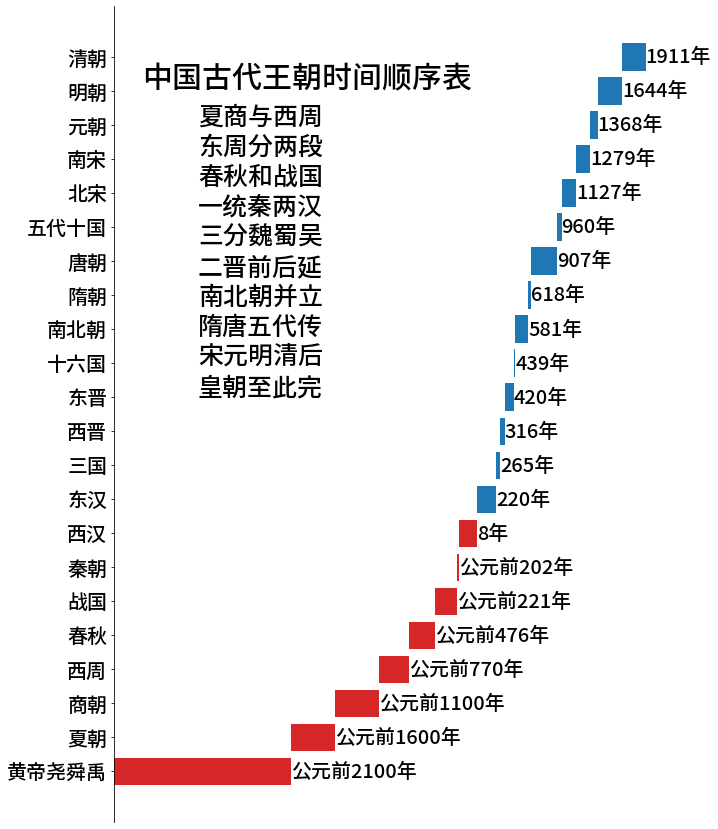

In [48]:
plt.rcParams['figure.figsize']=(10,15)

color=china['开始'].apply(lambda x: 'tab:blue' if x>0 else 'tab:red')
plt.barh(y='朝代',width='时长',left='开始',data=china,color=color)
plt.xticks([])

for y,time in enumerate(china['结束']):
    plt.text(time,y,'公元前%d年'%abs(time) if time<0 else '%d年'%time,fontproperties=myfont,fontsize=20,va='center')

ax=plt.gca()
ax.yaxis.set_ticklabels(china['朝代'],fontproperties=myfont)
ax.text(.05,.9,'中国古代王朝时间顺序表',fontsize=30,fontproperties=myfont,transform=ax.transAxes)
poem='''夏商与西周\n东周分两段\n春秋和战国\n一统秦两汉\n三分魏蜀吴\n二晋前后延\n南北朝并立\n隋唐五代传\n宋元明清后\n皇朝至此完\n'''
ax.text(.15,.88,poem,fontsize=25,va='top',fontproperties=myfont,transform=ax.transAxes)